In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import AgglomerativeClustering
import io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("data.csv", header=None)


In [ ]:
df

,0,1
0,-0.593257,0.326039
1,-0.050397,1.095127
2,1.685130,-0.074212
3,0.331759,0.814348
4,1.918354,0.024507
...,...,...
2995,0.367553,0.745716
2996,1.774294,0.489719
2997,0.666761,-0.325878
2998,-1.255312,0.358632


In [ ]:
df.columns = ["x","y"]

In [ ]:
df

,x,y
0,-0.593257,0.326039
1,-0.050397,1.095127
2,1.685130,-0.074212
3,0.331759,0.814348
4,1.918354,0.024507
...,...,...
2995,0.367553,0.745716
2996,1.774294,0.489719
2997,0.666761,-0.325878
2998,-1.255312,0.358632


In [ ]:
print(df.describe())

                 x            y
count  3000.000000  3000.000000
mean      0.489104     0.252705
std       0.887991     0.528218
min      -1.484747    -1.151245
25%      -0.145006    -0.179574
50%       0.505278     0.253444
75%       1.118206     0.681166
max       2.475283     1.644078


In [ ]:
df.corr()

,x,y
x,1.000000,-0.411716
y,-0.411716,1.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


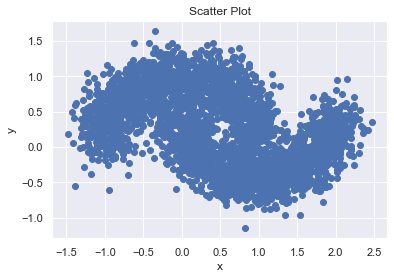

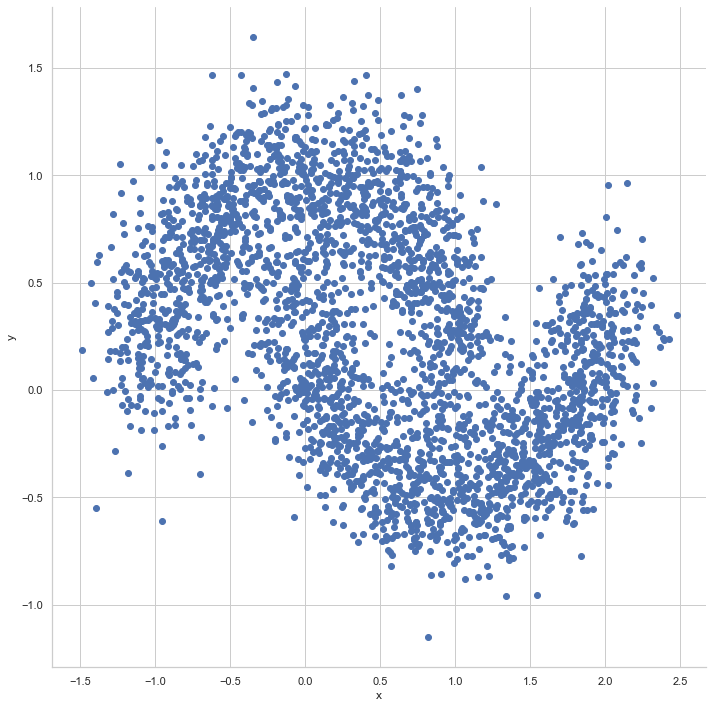

In [ ]:
# Scatter plot with x against class label
plt.scatter(df['x'], df['y'])
  
# Adding Title to the Plot
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('x')
plt.ylabel('y')
sns.set_style('whitegrid')
sns.FacetGrid(df,size=10).map(plt.scatter,'x','y').add_legend()  
plt.show()

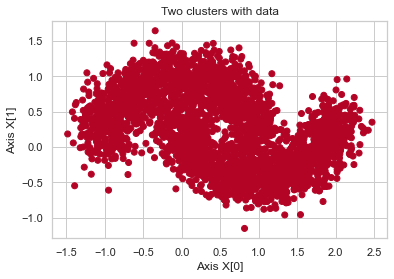

In [ ]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
x, y = (df['x'], df['y'])
X = np.vstack((x, y)).T


# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 10, min_samples = 100).fit(X)
labels = db_default.labels_

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Two clusters with data')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
range_min = [x for x in range(2, 51, 1)]
range_eps = [x / 100.0 for x in range(1, 51, 1)]               
dic = {}
for m in range_min:

    for e in range_eps:

        model_1 = DBSCAN(eps = e, min_samples = m).fit(X)

        core_samples_mask = np.zeros_like(model_1.labels_, dtype = bool)

        core_samples_mask[model_1.core_sample_indices_] = True

        labels = model_1.labels_

        if len( set(labels) ) > 1:

            silhouette_Avg = silhouette_score(X, labels)

            if silhouette_Avg > 0:

                dic[str(m) + " - " + str(e)] = silhouette_Avg

                
max_key = max(dic, key = dic.get)
print("parameter values are: ", max_key)
print("maximum silhouette score value is: ", dic[max_key])

parameter values are:  28 - 0.29
maximum silhouette score value is:  0.3537858931471345


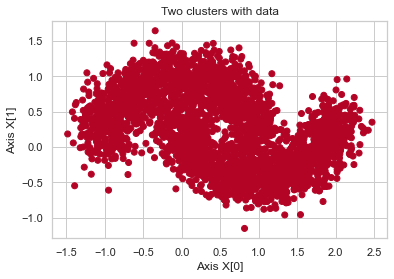

In [ ]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
x, y = (df['x'], df['y'])
X = np.vstack((x, y)).T


# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.29, min_samples = 28).fit(X)
labels = db_default.labels_

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Two clusters with data')

plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

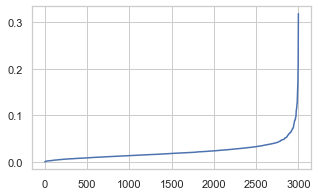

In [ ]:
x = df.loc[:, ['x','y']].values
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

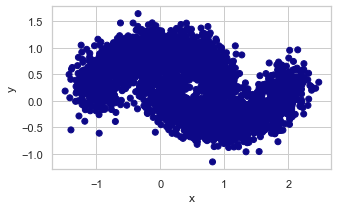

In [ ]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 12, min_samples = 20).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels
# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("x") # X-axis label
plt.ylabel("y") # Y-axis label
plt.show() # showing the plot

In [ ]:
X

array([[-0.59325729,  0.32603907],
       [-0.05039701,  1.09512673],
       [ 1.6851297 , -0.07421167],
       ...,
       [ 0.66676143, -0.32587752],
       [-1.25531237,  0.35863227],
       [ 0.18036305,  0.35811943]])

In [ ]:
df8 = df.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df8)
print(scaled)

[[0.22512188 0.52848434]
 [0.36220679 0.80361807]
 [0.80046786 0.38529848]
 ...
 [0.54330607 0.29526744]
 [0.05793749 0.54014425]
 [0.4204791  0.53996078]]


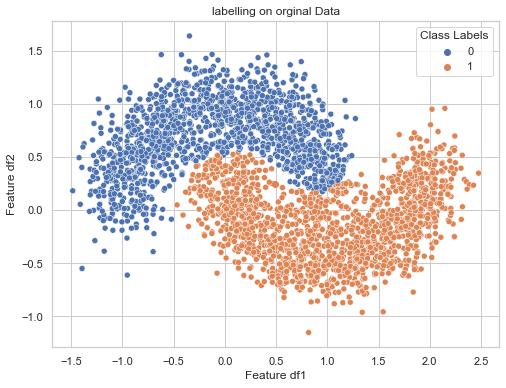

In [ ]:
dfr = pd.DataFrame()
meanx = df8['x'].mean()
meany = df8['y'].mean()
clustering = AgglomerativeClustering(n_clusters=2, linkage="ward")
Y_preds = clustering.fit_predict(scaled)
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x='x', y='y',hue = Y_preds)
ax.set(xlabel="Feature df1", ylabel="Feature df2", title="labelling on orginal Data")
ax.legend(title="Class Labels")
plt.scatter(meanx,meany)
plt.show()

In [ ]:
kmeans = KMeans(2)
kmeans.fit(df)

KMeans(n_clusters=2)

In [ ]:
identified_clusters = kmeans.fit_predict(df)
identified_clusters

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

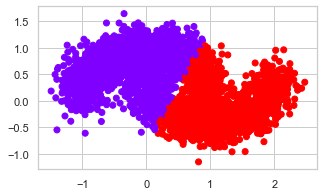

In [ ]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['x'],data_with_clusters['y'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [ ]:
df

,x,y
0,-0.593257,0.326039
1,-0.050397,1.095127
2,1.685130,-0.074212
3,0.331759,0.814348
4,1.918354,0.024507
...,...,...
2995,0.367553,0.745716
2996,1.774294,0.489719
2997,0.666761,-0.325878
2998,-1.255312,0.358632


In [ ]:
df.iloc[0][0]

-0.5932572935316355

In [ ]:
df4=df.copy()

In [ ]:
df4

,x,y
0,-0.593257,0.326039
1,-0.050397,1.095127
2,1.685130,-0.074212
3,0.331759,0.814348
4,1.918354,0.024507
...,...,...
2995,0.367553,0.745716
2996,1.774294,0.489719
2997,0.666761,-0.325878
2998,-1.255312,0.358632


In [ ]:
df4.iloc[0][0]

-0.5932572935316355

In [ ]:
df.iloc[0][0]

-0.5932572935316355

In [ ]:
df4

,x,y
0,-0.593257,0.326039
1,-0.050397,1.095127
2,1.685130,-0.074212
3,0.331759,0.814348
4,1.918354,0.024507
...,...,...
2995,0.367553,0.745716
2996,1.774294,0.489719
2997,0.666761,-0.325878
2998,-1.255312,0.358632


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


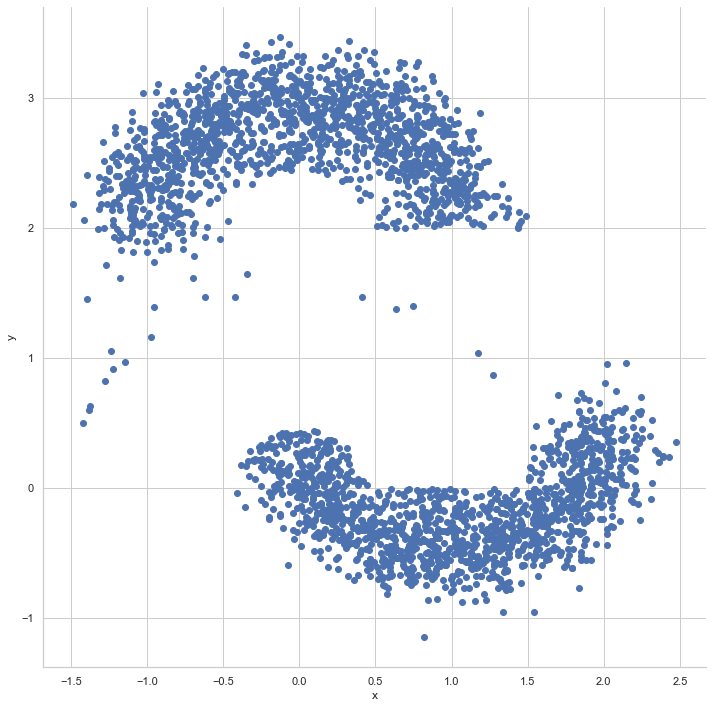

In [ ]:
for i in range(0,2999):
  if((0.45)**2 <= (df4.iloc[i][0]**2+df4.iloc[i][1]**2) and (df4.iloc[i][0]**2+df4.iloc[i][1]**2)  <= (1.5)**2 and df4.iloc[i][1] >= 0  ) :
    df4.iloc[i][1] = df4.iloc[i][1] +2
  if((df4.iloc[i][0]) <= -0.5 and (df4.iloc[i][1]) <= 0 ) :
    df4.iloc[i][1] = df4.iloc[i][1] +2

sns.set_style('whitegrid')
sns.FacetGrid(df4,size=10).map(plt.scatter,'x','y').add_legend()  
plt.show()


In [ ]:
df

,x,y
0,-0.593257,0.326039
1,-0.050397,1.095127
2,1.685130,-0.074212
3,0.331759,0.814348
4,1.918354,0.024507
...,...,...
2995,0.367553,0.745716
2996,1.774294,0.489719
2997,0.666761,-0.325878
2998,-1.255312,0.358632


In [ ]:
kmeans = KMeans(2)
kmeans.fit(df4)

KMeans(n_clusters=2)

In [ ]:
identified_clusters = kmeans.fit_predict(df)
identified_clusters

array([1, 1, 0, ..., 0, 1, 1], dtype=int32)

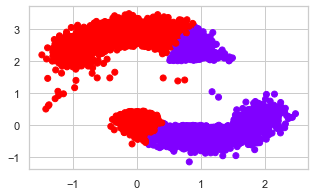

In [ ]:
data_with_clusters = df4.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['x'],data_with_clusters['y'],c=data_with_clusters['Clusters'],cmap='rainbow')

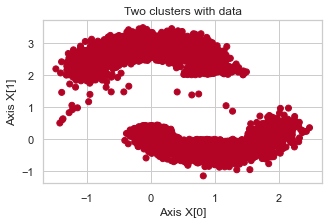

In [ ]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
x, y = (df4['x'], df4['y'])
X = np.vstack((x, y)).T


# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 10, min_samples = 100).fit(X)
labels = db_default.labels_

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Two clusters with data')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
range_min = [x for x in range(2, 51, 1)]
range_eps = [x / 100.0 for x in range(1, 51, 1)]               
dic = {}
for m in range_min:

    for e in range_eps:

        model_1 = DBSCAN(eps = e, min_samples = m).fit(X)

        core_samples_mask = np.zeros_like(model_1.labels_, dtype = bool)

        core_samples_mask[model_1.core_sample_indices_] = True

        labels = model_1.labels_

        if len( set(labels) ) > 1:

            silhouette_Avg = silhouette_score(X, labels)

            if silhouette_Avg > 0:

                dic[str(m) + " - " + str(e)] = silhouette_Avg

                
max_key = max(dic, key = dic.get)
print("parameter values are: ", max_key)
print("maximum silhouette score value is: ", dic[max_key])

parameter values are:  7 - 0.11
maximum silhouette score value is:  0.5569339640433356


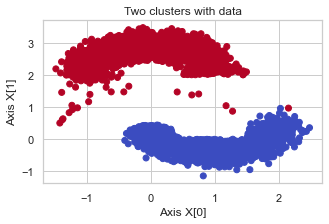

In [ ]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
x, y = (df4['x'], df4['y'])
X = np.vstack((x, y)).T


# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.29, min_samples = 28).fit(X)
labels = db_default.labels_

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Two clusters with data')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df4)
print(scaled)

[[0.22512188 0.75236753]
 [0.36220679 0.91877225]
 [0.80046786 0.23303391]
 ...
 [0.54330607 0.17858188]
 [0.05793749 0.7594196 ]
 [0.4204791  0.32657584]]


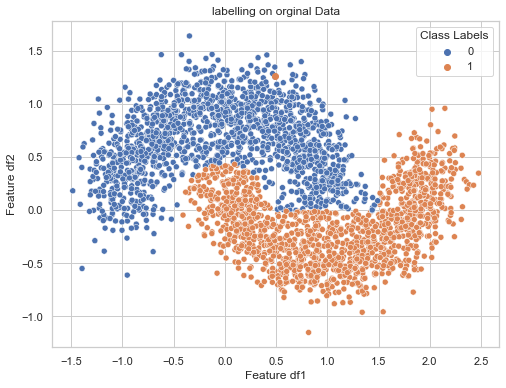

In [ ]:
dfr = pd.DataFrame()
meanx = df4['x'].mean()
meany = df4['y'].mean()
clustering = AgglomerativeClustering(n_clusters=2, linkage="ward")
Y_preds = clustering.fit_predict(scaled)
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=df, x='x', y='y',hue = Y_preds)
ax.set(xlabel="Feature df1", ylabel="Feature df2", title="labelling on orginal Data")
ax.legend(title="Class Labels")
plt.scatter(meanx,meany)
plt.show()

In [ ]:
pred = pd.DataFrame(Y_preds, columns = ['Class_Label'] , index=None)
print(pred)
pred.to_csv('predict.txt' , index = None)

      Class_Label
0               0
1               0
2               1
3               0
4               1
...           ...
2995            0
2996            1
2997            1
2998            0
2999            1

[3000 rows x 1 columns]
